In [1]:
#import the liberarys
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv('vehicle_train.csv')

In [3]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [4]:
df_test=pd.read_csv('vehicle_test.csv')

In [5]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11,1,< 1 Year,No,35786,152,53
1,381111,Male,40,1,28,0,1-2 Year,Yes,33762,7,111
2,381112,Male,47,1,28,0,1-2 Year,Yes,40050,124,199
3,381113,Male,24,1,27,1,< 1 Year,Yes,37356,152,187
4,381114,Male,27,1,28,1,< 1 Year,No,59097,152,297


In [6]:
print(df_test.shape,df_train.shape)

(127037, 11) (381109, 12)


In [7]:
#first we clean the train data set
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

- in the training dataset there is no outliers 
- In this dataset there is no use of id feature then we can remove that column. 

In [8]:
df_train.drop(['id'],axis=1,inplace=True)

In [9]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [10]:
df_train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [11]:
df_train['Vehicle_Age'].unique()
df_train['Vehicle_Age']=df_train['Vehicle_Age'].map({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3})

In [12]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,3,Yes,40454,26,217,1
1,Male,76,1,3,0,2,No,33536,26,183,0
2,Male,47,1,28,0,3,Yes,38294,26,27,1
3,Male,21,1,11,1,1,No,28619,152,203,0
4,Female,29,1,41,1,1,No,27496,152,39,0


### visulization

<AxesSubplot:xlabel='Gender', ylabel='Annual_Premium'>

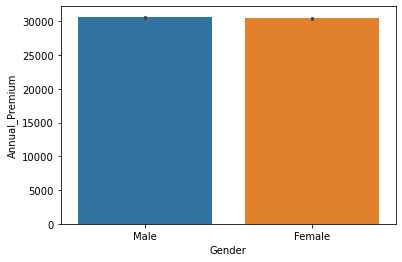

In [13]:

sns.barplot(x='Gender',y='Annual_Premium',data=df_train)

- from the above graph the male and feamle have equal annual premium


In [14]:
df_train['Age'].value_counts()

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

In [15]:
df_train['Age'].unique()

array([44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 37, 25, 42, 60, 65, 49,
       34, 51, 26, 57, 79, 48, 45, 72, 30, 54, 27, 38, 22, 78, 20, 39, 62,
       58, 59, 63, 50, 67, 77, 28, 69, 52, 31, 33, 43, 36, 53, 70, 46, 55,
       40, 61, 75, 64, 35, 66, 68, 74, 73, 84, 83, 81, 80, 82, 85],
      dtype=int64)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

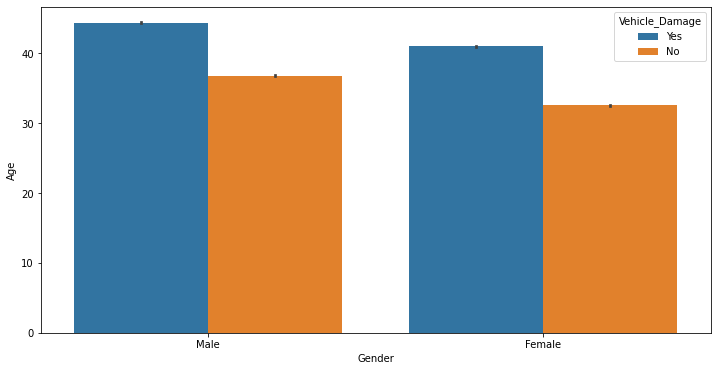

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x='Gender',y='Age',data=df_train,hue='Vehicle_Damage')

- from the above visulization,most of the people above age 40 ,their vehicles only damage only in the gender of male
- same feamle also like that.

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Annual_Premium'>

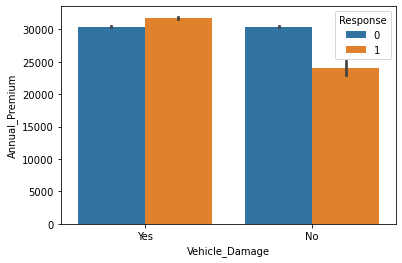

In [17]:
sns.barplot(x='Vehicle_Damage',y='Annual_Premium',data=df_train,hue='Response')

- from the above graph when the vehicle damage is done then they pay more than 30000
   annual premium and they take vehicle insurance

In [18]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,3,Yes,40454,26,217,1
1,Male,76,1,3,0,2,No,33536,26,183,0
2,Male,47,1,28,0,3,Yes,38294,26,27,1
3,Male,21,1,11,1,1,No,28619,152,203,0
4,Female,29,1,41,1,1,No,27496,152,39,0


<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

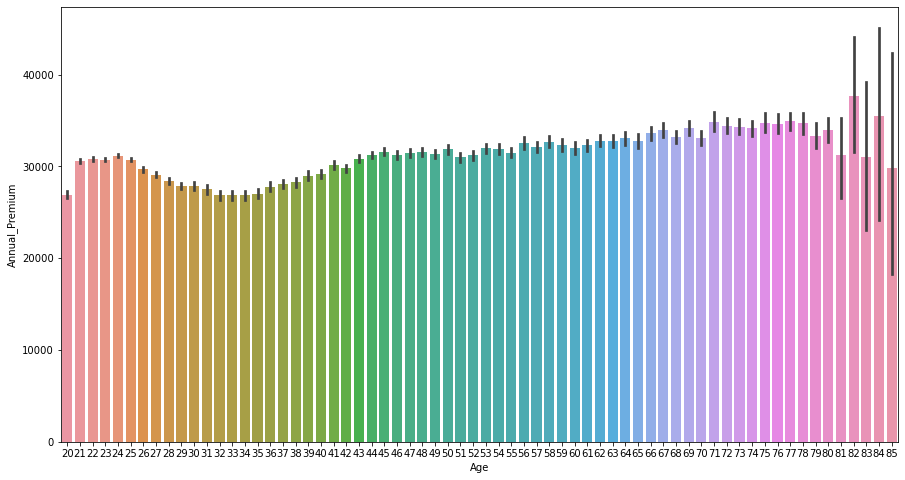

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age',y='Annual_Premium',data=df_train)

- from the above visulization,most of the people the age between 82-85 they wiil be highet annual_premium
- the age between 32-35 they will paid medium.
- the age below 20 they are not paid the annual_premium.

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='Age'>

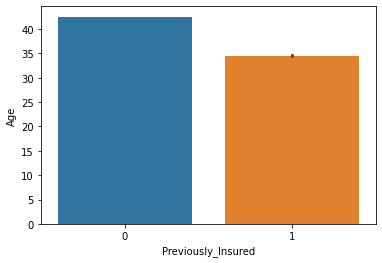

In [20]:
sns.barplot(df_train['Previously_Insured'],df_train['Age'])

- from the above visulization most of the people age between 0-30 they will taken the previous_injured.


In [21]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,3,Yes,40454,26,217,1
1,Male,76,1,3,0,2,No,33536,26,183,0
2,Male,47,1,28,0,3,Yes,38294,26,27,1
3,Male,21,1,11,1,1,No,28619,152,203,0
4,Female,29,1,41,1,1,No,27496,152,39,0


In [22]:
df_train['Policy_Sales_Channel'].unique()

array([ 26, 152, 160, 124,  14,  13,  30, 156, 163, 157, 122,  19,  22,
        15, 154,  16,  52, 155,  11, 151, 125,  25,  61,   1,  86,  31,
       150,  23,  60,  21, 121,   3, 139,  12,  29,  55,   7,  47, 127,
       153,  78, 158,  89,  32,   8,  10, 120,  65,   4,  42,  83, 136,
        24,  18,  56,  48, 106,  54,  93, 116,  91,  45,   9, 145, 147,
        44, 109,  37, 140, 107, 128, 131, 114, 118, 159, 119, 105, 135,
        62, 138, 129,  88,  92, 111, 113,  73,  36,  28,  35,  59,  53,
       148, 133, 108,  64,  39,  94, 132,  46,  81, 103,  90,  51,  27,
       146,  63,  96,  40,  66, 100,  95, 123,  98,  75,  69, 130, 134,
        49,  97,  38,  17, 110,  80,  71, 117,  58,  20,  76, 104,  87,
        84, 137, 126,  68,  67, 101, 115,  57,  82,  79, 112,  99,  70,
         2,  34,  33,  74, 102, 149,  43,   6,  50, 144, 143,  41],
      dtype=int64)

C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

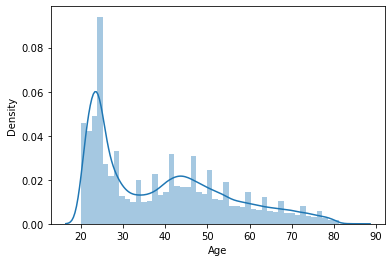

In [23]:
sns.distplot(df_train['Age'])

C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

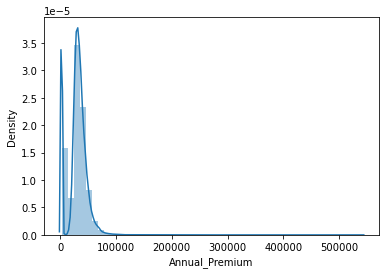

In [24]:
sns.distplot(df_train['Annual_Premium'],bins=50)

In [25]:
df_test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [26]:
df_test.drop(['id'],axis=1,inplace=True)

In [27]:
df_test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11,1,< 1 Year,No,35786,152,53
1,Male,40,1,28,0,1-2 Year,Yes,33762,7,111
2,Male,47,1,28,0,1-2 Year,Yes,40050,124,199
3,Male,24,1,27,1,< 1 Year,Yes,37356,152,187
4,Male,27,1,28,1,< 1 Year,No,59097,152,297


In [28]:
df_test['Vehicle_Age']=df_test['Vehicle_Age'].map({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3})

In [29]:
df_test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11,1,1,No,35786,152,53
1,Male,40,1,28,0,2,Yes,33762,7,111
2,Male,47,1,28,0,2,Yes,40050,124,199
3,Male,24,1,27,1,1,Yes,37356,152,187
4,Male,27,1,28,1,1,No,59097,152,297


In [30]:
df_train['Gender']=df_train['Gender'].map({'Male':0,'Female':1})
df_train['Vehicle_Damage']=df_train['Vehicle_Damage'].map({'Yes':1,'No':0})

In [31]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28,0,3,1,40454,26,217,1
1,0,76,1,3,0,2,0,33536,26,183,0
2,0,47,1,28,0,3,1,38294,26,27,1
3,0,21,1,11,1,1,0,28619,152,203,0
4,1,29,1,41,1,1,0,27496,152,39,0


In [32]:
x=df_train.iloc[:,:-1]
y=df_train.iloc[:,-1]

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [36]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(285831, 10) (95278, 10) (285831,) (95278,)


In [37]:
#now we do feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [44]:
#now we import the liberarys
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,\
precision_score,recall_score,roc_auc_score,f1_score

In [45]:
models={
    'Logistic Regression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train) #to train the model.
    
    #making predections
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #training_set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    #test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred,average='weighted')
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print('model performance of training set')
    print('accuracy : ',model_train_accuracy)
    print('F1 score : ',model_train_f1)
    
    print('precision : ',model_train_precision)
    print('recall : ',model_train_recall)
    print('roauc_score : ',model_train_rocauc_score)
    
    
    print('-----------------------------------------------------------')
    
    print('Model performance of testing set')
    print('accuracy : ',model_test_accuracy)
    print('F1 score : ',model_test_f1)
    
    print('precision : ',model_test_precision)
    print('recall : ',model_test_recall)
    print('roauc_score : ',model_test_rocauc_score)
    
    
    print('='*38)
    print('\n')

Logistic Regression
model performance of training set
accuracy :  0.877105702320602
F1 score :  0.8203370947199756
precision :  0.3673469387755102
recall :  0.002052744119743407
roauc_score :  0.5007791197508542
-----------------------------------------------------------
Model performance of testing set
accuracy :  0.8777262327084951
F1 score :  0.8211630563032013
precision :  0.8163510419003334
recall :  0.0018908465835840139
roauc_score :  0.5007242451896198


DecisionTree
model performance of training set
accuracy :  0.9998880457333179
F1 score :  0.999888023758343
precision :  1.0
recall :  0.999087669280114
roauc_score :  0.999543834640057
-----------------------------------------------------------
Model performance of testing set
accuracy :  0.8247864144923277
F1 score :  0.8264650250033897
precision :  0.8281961716679208
recall :  0.30545767082079933
roauc_score :  0.6012421598966089


Random Forest
model performance of training set
accuracy :  0.9998705528791488
F1 score :  0.9

In [46]:
#from this decision tree is the best
rf_params={'max_depth':[5,8,15,6,None,10],
           'max_features':[5,7,10,'auto','log2'],
           'min_samples_split':[2,8,15,20],
           'criterion':['gini', 'entropy', 'log_loss']
            }

In [47]:
rf_params

{'max_depth': [5, 8, 15, 6, None, 10],
 'max_features': [5, 7, 10, 'auto', 'log2'],
 'min_samples_split': [2, 8, 15, 20],
 'criterion': ['gini', 'entropy', 'log_loss']}

In [48]:
#models list of hyperparameter tuning
randomcv_models=[
    ('DescionTree',DecisionTreeClassifier(),rf_params)
    ]

In [49]:
randomcv_models

[('DescionTree',
  DecisionTreeClassifier(),
  {'max_depth': [5, 8, 15, 6, None, 10],
   'max_features': [5, 7, 10, 'auto', 'log2'],
   'min_samples_split': [2, 8, 15, 20],
   'criterion': ['gini', 'entropy', 'log_loss']})]

In [50]:
from sklearn.model_selection import RandomizedSearchCV
model_params={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                             param_distributions=params,
                             n_iter=100,
                             cv=3,
                             verbose=2,
                             n_jobs=-1
                             )
    random.fit(x_train,y_train)
    model_params[name]=random.best_params_
    
    
for model_name in model_params:
    print(model_name)
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saika\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\saika\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

DescionTree
{'min_samples_split': 15, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy'}


In [52]:
#this is my best parameters
#now we have to fit the model
Dt=DecisionTreeClassifier(min_samples_split= 15, max_features='auto', max_depth=5, criterion='entropy')

In [54]:
Dt

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_split=15)

In [56]:
Dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_split=15)

In [57]:
y_pred=Dt.predict(x_test)

In [58]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83643
           1       0.00      0.00      0.00     11635

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



C:\Users\saika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
